# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import re
import sys
import matplotlib

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
def scatter_2d_cate(dataset, score, covariate, title, save_name, save_folder=None,
                    cmap_name='Set1', fontsize=20, marker_size=60, transparency=1):
    marker_list = np.array(["o", "s", "v", "+", "x","*"])
    levels = np.unique(dataset[covariate], return_inverse=True)
    #plt.style.use('ggplot')
    plt.figure(figsize=(10, 10))
    c_n = len(levels[0])
    col_list = matplotlib.cm.get_cmap(cmap_name)(range(c_n))
    handles = []
    for i in range(c_n):
        ind = np.where(levels[1]==i)[0]
        scatter = plt.scatter(score[ind,0], score[ind,1], color=col_list[levels[1][ind]], s=marker_size, 
                              alpha=transparency, marker=marker_list[i])
        handles.append(scatter)
    plt.title('{} | Test'.format(title), fontsize=fontsize)
    legend = plt.legend(handles=handles, labels=list(levels[0]), title=covariate, fontsize=20)
    legend.get_title().set_fontsize('20')
    plt.xticks(fontsize=fontsize, rotation=45)
#     plt.xlabel('Variance Explained by PC1: {:.2f}%'.format(pca.explained_variance_ratio_[0]*100), fontsize=fontsize)
    plt.xlabel('Comp 1', fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
#     plt.ylabel('Variance Explained by PC2: {:.2f}%'.format(pca.explained_variance_ratio_[1]*100), fontsize=fontsize)
    plt.ylabel('Comp 2', fontsize=fontsize)
    if save_folder is None:
        save_folder = './figures/mixOmics_sPLSDA/{}'.format(covariate)
    os.makedirs(save_folder, exist_ok=True)
    plt.savefig(os.path.join(save_folder, '{}.pdf'.format(save_name)), bbox_inches='tight')
    plt.show()

In [4]:
def plot_splsda(covariate, fontsize=40):
    gut_16s_subj = pd.read_csv('./data/mixOmics_output/gut_16s_subj.csv', header=0, index_col=1)
    metabolome_subj = pd.read_csv('./data/mixOmics_output/metabolome_subj.csv', header=0, index_col=1)
    
    name_dict = dict(zip(['train', 'val', 'test'], ['Training', 'Validation', 'Testing']))
    
    for which_data in ['test']:
        splsda_g = pd.read_csv('./data/mixOmics_output/splsda_g_{}_{}.csv'.format(which_data, covariate), 
                               header=0, index_col=0)
        splsda_m = pd.read_csv('./data/mixOmics_output/splsda_g_{}_{}.csv'.format(which_data, covariate), 
                               header=0, index_col=0)
        
        indexes = splsda_g.index

        scatter_2d_cate(gut_16s_subj.loc[indexes,:], np.array(splsda_g),
                        covariate, 'sPLSDA\n gut_16s', 
                        save_name='splsda_microbiome', fontsize=fontsize)
        scatter_2d_cate(metabolome_subj.loc[indexes,:], np.array(splsda_m),
                        covariate, '{} - sPLSDA on metabolome'.format(name_dict[which_data]), 
                        save_name='splsda_metabolome', fontsize=fontsize)


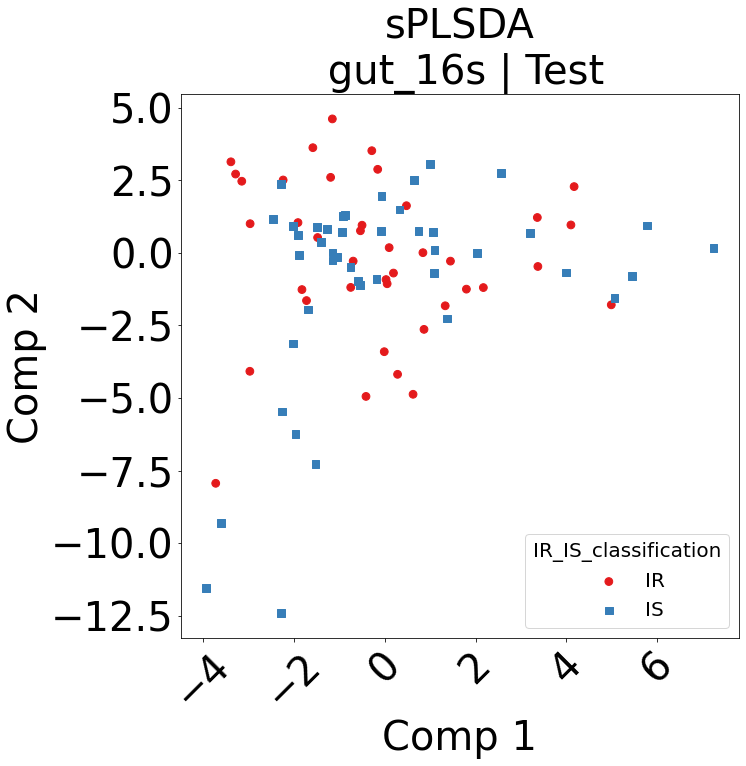

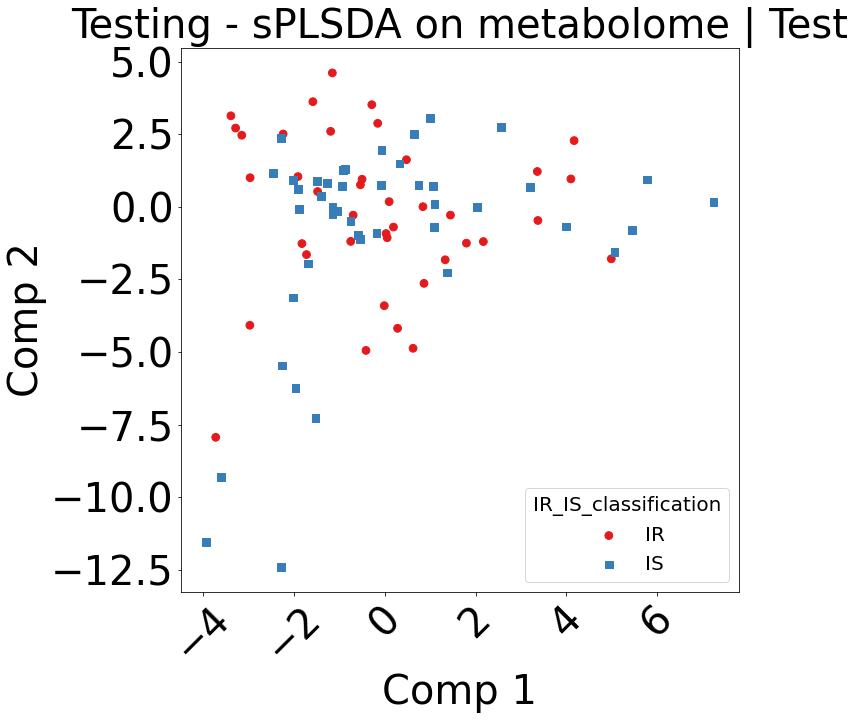

In [5]:
plot_splsda('IR_IS_classification')

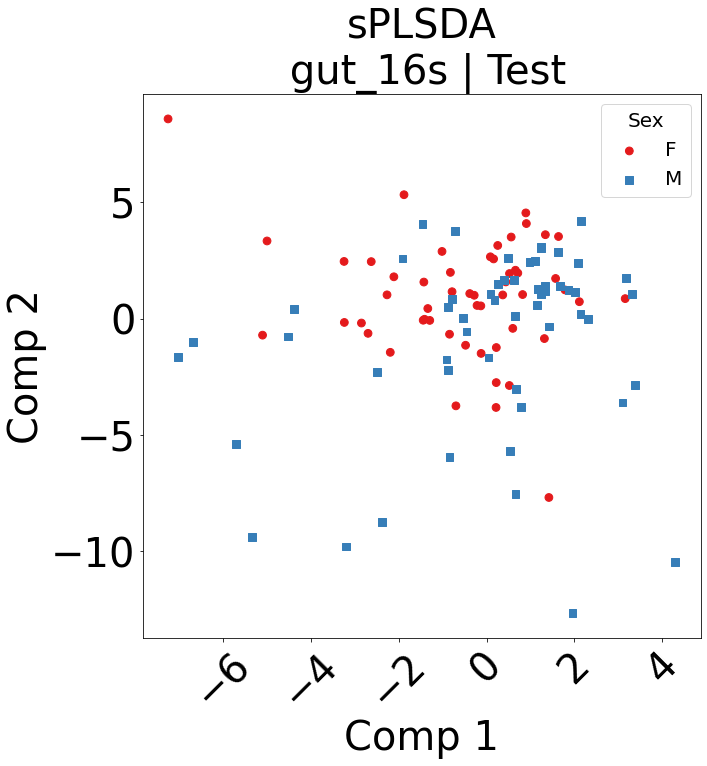

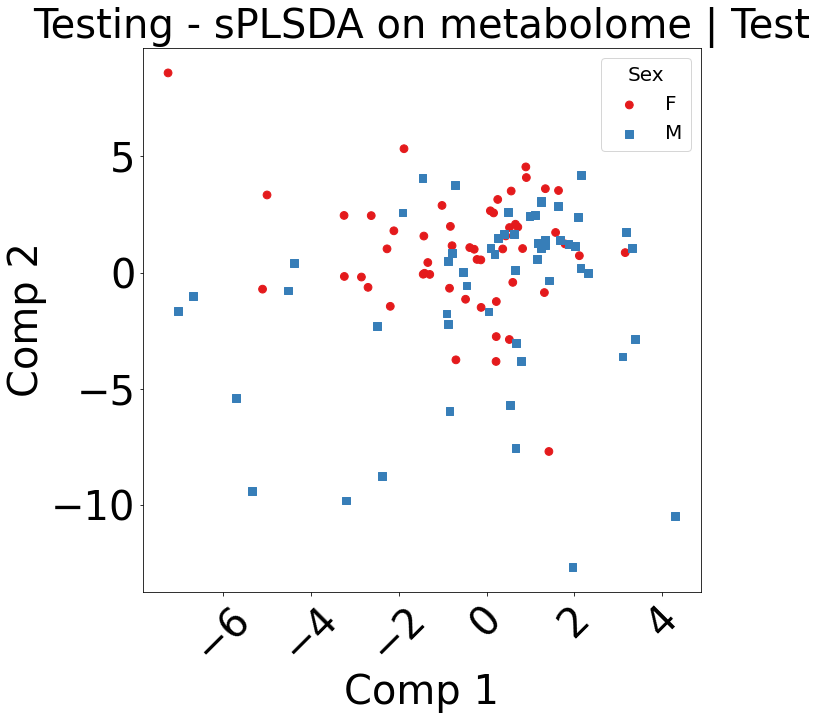

In [6]:
plot_splsda('Sex')

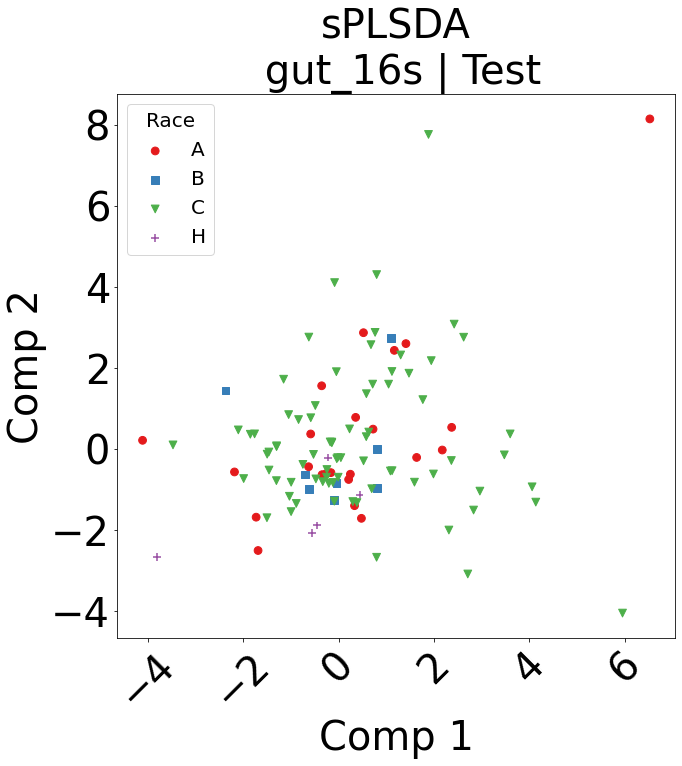

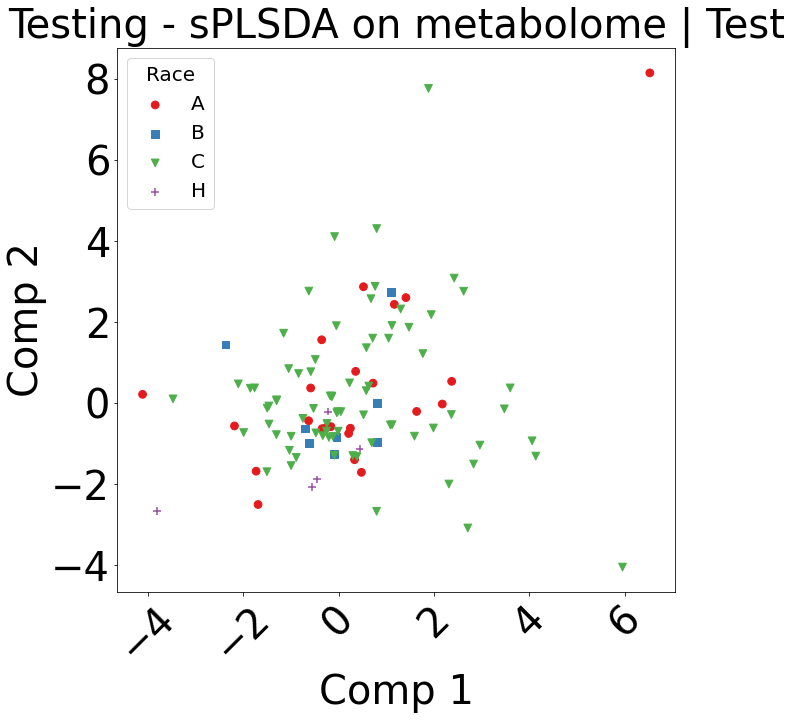

In [7]:
plot_splsda('Race')